In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

### Download data

In [2]:
# Get the current working directory
directory = os.getcwd()

# Load data
directory_data = directory + '\\Data\\sfo 2018_data file_final_Weighted.xlsx'
data_2018 = pd.read_excel(directory_data, engine='openpyxl', sheet_name='DATA')
code_list_2018 = pd.read_excel(directory_data, engine='openpyxl', sheet_name='Code List')

### Get to know data

In [3]:
data_2018.head()

,RESPNUM,CCGID,RUNID,INTDATE,DAY,GATE,BAREA,STRATA,PEAK,METH,...,HOME,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT
0,1842,1680,552,21,2,102,G,3,3,1,...,15,2,6,2,0,0,2,2,1,0.670484
1,1844,1681,552,21,2,102,G,3,3,1,...,15,2,4,1,2,1,2,2,1,0.670484
2,1840,1678,552,21,2,102,G,3,3,1,...,15,1,5,1,5,2,2,2,1,0.670484
3,1837,1676,552,21,2,102,G,3,3,1,...,15,2,2,2,3,3,2,1,1,0.670484
4,1833,1674,552,21,2,102,G,3,3,1,...,15,2,2,2,2,2,2,2,1,0.670484


In [4]:
data_2018.describe()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,HOME,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT
count,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,...,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000
mean,1821.937700,1419.065504,14.079032,4.127447,50.647205,2.148095,2.161979,1.012460,1.880384,1414.961552,...,18.608046,1.657529,4.045568,1.448558,2.046992,1.817017,1.595586,1.541118,1.103596,0.999999
std,942.654669,861.370970,8.193408,1.692994,33.241023,0.780914,0.750427,0.125978,0.324569,1714.986966,...,26.604692,0.730039,1.864170,0.611737,1.493790,0.700515,0.678995,0.697855,0.442109,0.490976
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.208038
25%,1052.000000,707.000000,8.000000,3.000000,12.000000,2.000000,2.000000,1.000000,2.000000,394.000000,...,7.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.670484
50%,1869.000000,1409.000000,15.000000,4.000000,52.000000,2.000000,2.000000,1.000000,2.000000,857.000000,...,10.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.061139
75%,2594.000000,2116.000000,20.000000,5.000000,81.000000,3.000000,3.000000,1.000000,2.000000,1747.000000,...,14.000000,2.000000,6.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.486925
max,9004.000000,9004.000000,31.000000,7.000000,102.000000,3.000000,3.000000,3.000000,2.000000,8839.000000,...,99.000000,2.000000,7.000000,3.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.887528


In [60]:
data_2018.columns

Index(['RESPNUM', 'CCGID', 'RUNID', 'INTDATE', 'DAY', 'GATE', 'BAREA',
       'STRATA', 'PEAK', 'METH', 'SAQ', 'AIRLINE', 'DESTINATION', 'FLIGHT',
       'AIRLINE_CODE', 'DEST_CODE', 'DESTGEO', 'DESTMARK', 'ARRTIME',
       'DEPTIME', 'HOWLONG', 'Q2PURP1', 'Q2PURP2', 'Q2PURP3', 'Q3GETTO1',
       'Q3GETTO2', 'Q3GETTO3', 'Q3PARK', 'Q4BAGS', 'Q4STORE', 'Q4FOOD',
       'Q4WIFI', 'Q5TIMESFLOWN', 'Q5FIRSTTIME', 'Q6LONGUSE', 'Q7ART', 'Q7FOOD',
       'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP',
       'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL',
       'Q7ALL', 'Q8-1', 'Q8-2', 'Q8-3', 'Q8-4', 'Q8-5', 'Q8-6', 'Q9Boarding',
       'Q9AirTrain', 'Q9Rental', 'Q9Food', 'Q9Restroom', 'Q9All', 'Q9-1',
       'Q9-2', 'Q9-3', 'Q10Safe', 'Q10-1', 'Q10-2', 'Q10-3', 'Q11TSAPRE',
       'Q12PRECHECKRATE', 'Q12-1', 'Q12-2', 'Q12-3', 'Q13COUNTY', 'Q13GETRATE',
       'Q14FIND ', 'Q14PASSTHRU', 'Q15PROBLEM', 'Q15A', 'Q15-1', 'Q15-2',
       'Q15-3', 'N

In [74]:
# Variable with null
columns_null = ['Q2PURP2', 'Q2PURP3', 'Q3GETTO2', 'Q3GETTO3', 'Q3PARK', 'Q8-2', 'Q8-3', 'Q8-4', 'Q8-5', 'Q8-6', 'Q9-2', 'Q9-3', 'Q10-2', 'Q10-3', 'Q12PRECHECKRATE', 'Q12-1', 'Q12-2', 'Q12-3', 'Q15A', 'Q15-1', 'Q15-2', 'Q15-3', 'Q18CITY', 'Q18COUNTY', 'Q18ZIP', 'Q18STATE', 'Q18COUNTRY']
data_2018.isnull().sum()

RESPNUM    0
CCGID      0
RUNID      0
INTDATE    0
DAY        0
          ..
Q23FLY     0
Q24SJC     0
Q24OAK     0
LANG       0
WEIGHT     0
Length: 100, dtype: int64

In [75]:
# Variable with hidden null as 0
columns_0 = ['Q2PURP1', 'Q4BAGS', 'Q4STORE', 'Q4FOOD', 'Q4WIFI', 'Q5TIMESFLOWN', 'Q5FIRSTTIME', 'Q6LONGUSE', 'Q7ART', 'Q7FOOD', 'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP', 'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL', 'Q8-1', 'Q9Boarding', 'Q9AirTrain', 'Q9Rental', 'Q9Food', 'Q9Restroom', 'Q9All', 'Q10Safe', 'Q10-1', 'Q11TSAPRE', 'Q13GETRATE', 'Q14FIND ', 'Q14PASSTHRU', 'Q15PROBLEM',  'Q17LIVE', 'Q19Clear', 'Q20Age', 'Q21Gender', 'Q22Income', 'Q23FLY', 'Q24SJC', 'Q24OAK']
# Variable with hidden null as 11 - 'NETPRO  '
# Variable with hidden null as 99 - 'HOME'
# Variable with hidden null as BLANK - 'Q7ALL'
print(pd.unique(data_2018['Q24OAK']))

[2 1 0 3]


In [76]:
# Columns without null values
columns_not_null = data_2018.columns.copy().drop(['Q2PURP2', 'Q2PURP3', 'Q3GETTO2', 'Q3GETTO3', 'Q3PARK', 'Q8-2', 'Q8-3', 'Q8-4', 'Q8-5', 'Q8-6', 'Q9-2', 'Q9-3', 'Q10-2', 'Q10-3', 'Q12PRECHECKRATE', 'Q12-1', 'Q12-2', 'Q12-3', 'Q15A', 'Q15-1', 'Q15-2', 'Q15-3', 'Q18CITY', 'Q18COUNTY', 'Q18ZIP', 'Q18STATE', 'Q18COUNTRY', 'Q2PURP1', 'Q4BAGS', 'Q4STORE', 'Q4FOOD', 'Q4WIFI', 'Q5TIMESFLOWN', 'Q5FIRSTTIME', 'Q6LONGUSE', 'Q7ART', 'Q7FOOD', 'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP', 'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL', 'Q8-1', 'Q9Boarding', 'Q9AirTrain', 'Q9Rental', 'Q9Food', 'Q9Restroom', 'Q9All', 'Q10Safe', 'Q10-1', 'Q11TSAPRE', 'Q13GETRATE', 'Q14FIND ', 'Q14PASSTHRU', 'Q15PROBLEM',  'Q17LIVE', 'Q19Clear', 'Q20Age', 'Q21Gender', 'Q22Income', 'Q23FLY', 'Q24SJC', 'Q24OAK', 'NETPRO  ', 'HOME', 'Q7ALL'])
columns_not_null

Index(['RESPNUM', 'CCGID', 'RUNID', 'INTDATE', 'DAY', 'GATE', 'BAREA',
       'STRATA', 'PEAK', 'METH', 'SAQ', 'AIRLINE', 'DESTINATION', 'FLIGHT',
       'AIRLINE_CODE', 'DEST_CODE', 'DESTGEO', 'DESTMARK', 'ARRTIME',
       'DEPTIME', 'HOWLONG', 'Q3GETTO1', 'Q9-1', 'Q13COUNTY', 'LANG',
       'WEIGHT'],
      dtype='object')

In [84]:
# Number of records after dropping all hidden null records
data_2018_not_null = data_2018.copy()
for col in columns_0:
    data_2018_not_null = data_2018_not_null.loc[data_2018_not_null[col] != 0]
data_2018_not_null = data_2018_not_null.loc[data_2018_not_null['NETPRO  '] != 11]
data_2018_not_null = data_2018_not_null.loc[data_2018_not_null['HOME'] != 99]
data_2018_not_null = data_2018_not_null.loc[data_2018_not_null['Q7ALL'] != 'BLANK']
len(data_2018_not_null)

390

In [91]:
data_2018.dtypes

RESPNUM      int64
CCGID        int64
RUNID       object
INTDATE      int64
DAY          int64
            ...   
Q23FLY       int64
Q24SJC       int64
Q24OAK       int64
LANG         int64
WEIGHT     float64
Length: 100, dtype: object

In [95]:
data_2018_object = data_2018.select_dtypes(include=['object'])
data_2018_object.head()

,RUNID,BAREA,AIRLINE,DESTINATION,ARRTIME,DEPTIME,HOWLONG,Q7ALL,Q8-5,Q15A,Q18CITY,Q18COUNTY,Q18STATE,Q18COUNTRY
0,552,G,TURKISH AIRLINES,ISTANBUL,14:00:00,18:15:00,255.0,4,NaN,NaN,NaN,NaN,NaN,CYPRUS
1,552,G,TURKISH AIRLINES,ISTANBUL,13:00:00,18:15:00,315,4,NaN,NaN,ISTANBUL,NaN,NaN,TURKEY
2,552,G,TURKISH AIRLINES,ISTANBUL,15:30:00,18:15:00,165.0,4,NaN,NaN,IZMIR,NaN,NaN,TURKEY
3,552,G,TURKISH AIRLINES,ISTANBUL,14:30:00,18:15:00,225,4,NaN,NaN,SKOPJE,NaN,NaN,MACEDONIA
4,552,G,TURKISH AIRLINES,ISTANBUL,15:20:00,18:15:00,175.0,BLANK,NaN,I FLEW WITH TK A NUMBER OF TIMES AND NEVER ENC...,REUTLINGEN,NaN,NaN,GERMANY


In [96]:
data_2018_numeric = data_2018.select_dtypes(include=['int64', 'float64'])
data_2018_numeric.head()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,HOME,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT
0,1842,1680,21,2,102,3,3,1,2,80,...,15,2,6,2,0,0,2,2,1,0.670484
1,1844,1681,21,2,102,3,3,1,2,80,...,15,2,4,1,2,1,2,2,1,0.670484
2,1840,1678,21,2,102,3,3,1,1,80,...,15,1,5,1,5,2,2,2,1,0.670484
3,1837,1676,21,2,102,3,3,1,1,80,...,15,2,2,2,3,3,2,1,1,0.670484
4,1833,1674,21,2,102,3,3,1,2,80,...,15,2,2,2,2,2,2,2,1,0.670484


In [ ]:
# TODO

In [ ]:
data_2018['Q7SCREENS'].corr(data_2018['Q7WIFI'])

### Prepare data

In [97]:
data_2018.loc[data_2018['Q7ALL'] == 'BLANK', 'Q7ALL'] = 0

In [98]:
data_2018['Q7MEAN'] = data_2018.loc[:, ['Q7ART', 'Q7FOOD', 'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP', 'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL']].mean(axis=1)

In [99]:
data_2018 = data_2018.astype({'Q7MEAN': 'int64'})
data_2018 = data_2018.astype({'Q7ALL': 'int64'})
data_2018['Q7MEAN'].corr(data_2018['Q7ALL'])

0.4323190874255099

In [132]:
# Select columns
columns_quantitative = ['DAY', 'STRATA', 'DESTMARK', 'Q5TIMESFLOWN', 'Q6LONGUSE', 'Q7ART', 'Q7FOOD', 'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP', 'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL', 'Q7MEAN', 'Q7ALL', 'Q9Boarding', 'Q9AirTrain', 'Q9Rental', 'Q9Food', 'Q9Restroom', 'Q9All', 'Q10Safe', 'Q13GETRATE', 'Q14FIND ', 'Q14PASSTHRU', 'NETPRO  ', 'Q20Age', 'Q22Income']
data_2018_quantitative = data_2018[columns_quantitative]

data_2018_quantitative.head()

,DAY,STRATA,DESTMARK,Q5TIMESFLOWN,Q6LONGUSE,Q7ART,Q7FOOD,Q7STORE,Q7SIGN,Q7WALKWAY,...,Q9Food,Q9Restroom,Q9All,Q10Safe,Q13GETRATE,Q14FIND,Q14PASSTHRU,NETPRO,Q20Age,Q22Income
0,2,3,4,2,1,6,6,3,4,4,...,6,4,3,3,5,4,3,5,6,0
1,2,3,4,1,1,6,3,4,4,4,...,6,4,4,4,4,4,3,7,4,2
2,2,3,4,1,3,3,6,4,4,6,...,6,2,3,4,4,5,3,7,5,5
3,2,3,4,2,0,0,4,4,4,5,...,3,4,4,4,0,0,0,8,2,3
4,2,3,4,3,2,0,0,0,0,0,...,4,5,5,3,3,3,3,8,2,2


In [133]:
print(data_2018_quantitative.isnull().sum())

DAY             0
STRATA          0
DESTMARK        0
Q5TIMESFLOWN    0
Q6LONGUSE       0
Q7ART           0
Q7FOOD          0
Q7STORE         0
Q7SIGN          0
Q7WALKWAY       0
Q7SCREENS       0
Q7INFODOWN      0
Q7INFOUP        0
Q7WIFI          0
Q7ROADS         0
Q7PARK          0
Q7AIRTRAIN      0
Q7LTPARKING     0
Q7RENTAL        0
Q7MEAN          0
Q7ALL           0
Q9Boarding      0
Q9AirTrain      0
Q9Rental        0
Q9Food          0
Q9Restroom      0
Q9All           0
Q10Safe         0
Q13GETRATE      0
Q14FIND         0
Q14PASSTHRU     0
NETPRO          0
Q20Age          0
Q22Income       0
dtype: int64


### First trial of k-means on quantitative data

In [166]:
scaler = StandardScaler()
scaler.fit(data_2018_quantitative)
scaled_data = scaler.transform(data_2018_quantitative)
scaled_data

array([[-1.2568419 ,  1.0911016 ,  0.72857123, ..., -1.37057818,
         0.51452297,  0.51452297],
       [-1.2568419 ,  1.0911016 ,  0.72857123, ..., -0.03146371,
         0.51452297,  0.51452297],
       [-1.2568419 ,  1.0911016 ,  0.72857123, ...,  1.97720799,
         0.51452297,  0.51452297],
       ...,
       [ 1.697031  , -0.1896775 ,  0.72857123, ...,  1.30765076,
         0.51452297,  0.51452297],
       [ 1.10625642,  1.0911016 , -1.14385017, ...,  1.30765076,
         0.51452297,  0.51452297],
       [-0.66606732,  1.0911016 , -1.14385017, ..., -1.37057818,
        -1.23100243, -1.23100243]])

In [167]:
# data_2018_concat = pd.concat([data_2018.loc[:, ~data_2018.columns.isin(columns_quantitative)],
#                               pd.DataFrame(scaled_data, columns = columns_quantitative)], axis=1)
# data_2018_concat

In [168]:
def find_best_clusters(df, maximum_K):

    clusters_centers = []
    k_values = []

    for k in range(1, maximum_K):

        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)

    #Generate elbow plot
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

    # return clusters_centers, k_values

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\

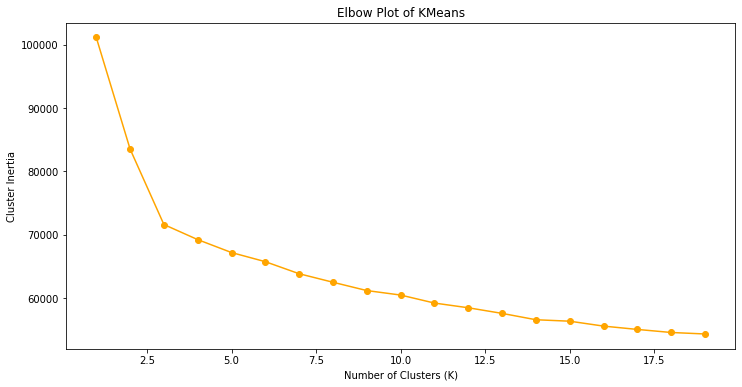

In [169]:
find_best_clusters(scaled_data, 20)

In [170]:
kmeans_model = KMeans(n_clusters = 3)

kmeans_model.fit(scaled_data)

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [171]:
data_2018_quantitative['clusters'] = kmeans_model.labels_

data_2018_quantitative.head()

<ipython-input-171-eed1dd94fc39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018_quantitative['clusters'] = kmeans_model.labels_


,DAY,STRATA,DESTMARK,Q5TIMESFLOWN,Q6LONGUSE,Q7ART,Q7FOOD,Q7STORE,Q7SIGN,Q7WALKWAY,...,Q9All,Q10Safe,Q13GETRATE,Q14FIND,Q14PASSTHRU,NETPRO,Q20Age,Q22Income,clusters,clusters_2
0,2,3,4,2,1,6,6,3,4,4,...,3,3,5,4,3,5,6,0,2,1
1,2,3,4,1,1,6,3,4,4,4,...,4,4,4,4,3,7,4,2,2,1
2,2,3,4,1,3,3,6,4,4,6,...,3,4,4,5,3,7,5,5,2,1
3,2,3,4,2,0,0,4,4,4,5,...,4,4,0,0,0,8,2,3,0,2
4,2,3,4,3,2,0,0,0,0,0,...,5,3,3,3,3,8,2,2,0,2


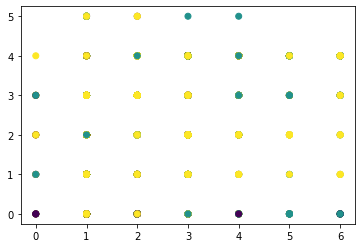

In [172]:
plt.scatter(data_2018_quantitative['Q5TIMESFLOWN'],
            data_2018_quantitative['Q22Income'],
            c = data_2018_quantitative['clusters'])

In [173]:
data_2018_quantitative.loc[data_2018_quantitative['clusters'] == 0].describe()
# Medium rating, medium size (997), the wealthiest, less willing to recommend

,DAY,STRATA,DESTMARK,Q5TIMESFLOWN,Q6LONGUSE,Q7ART,Q7FOOD,Q7STORE,Q7SIGN,Q7WALKWAY,...,Q9All,Q10Safe,Q13GETRATE,Q14FIND,Q14PASSTHRU,NETPRO,Q20Age,Q22Income,clusters,clusters_2
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,...,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.0,169.0
mean,4.112426,2.171598,3.224852,2.183432,2.284024,1.952663,1.988166,1.615385,1.928994,1.911243,...,2.378698,3.065089,1.905325,2.573964,2.153846,8.124260,4.017751,1.307692,0.0,2.0
std,1.691829,0.723844,1.078622,1.462454,1.414985,2.052323,1.858020,1.755942,1.925932,1.990556,...,2.078466,1.899693,2.070894,2.114752,2.173980,2.695223,2.541263,1.511858,0.0,0.0
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.0
25%,3.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,7.000000,2.000000,0.000000,0.0,2.0
50%,4.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,...,3.000000,4.000000,1.000000,3.000000,2.000000,9.000000,5.000000,1.000000,0.0,2.0
75%,5.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,...,4.000000,5.000000,4.000000,5.000000,4.000000,10.000000,6.000000,2.000000,0.0,2.0
max,7.000000,3.000000,4.000000,6.000000,4.000000,6.000000,6.000000,6.000000,6.000000,5.000000,...,5.000000,5.000000,6.000000,6.000000,6.000000,11.000000,7.000000,5.000000,0.0,2.0


In [174]:
data_2018_quantitative.loc[data_2018_quantitative['clusters'] == 1].describe()
# High rating, the largest (1643)

,DAY,STRATA,DESTMARK,Q5TIMESFLOWN,Q6LONGUSE,Q7ART,Q7FOOD,Q7STORE,Q7SIGN,Q7WALKWAY,...,Q9All,Q10Safe,Q13GETRATE,Q14FIND,Q14PASSTHRU,NETPRO,Q20Age,Q22Income,clusters,clusters_2
count,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,...,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.0,997.0
mean,4.199599,2.193581,3.273821,2.562688,2.756269,3.730191,3.244734,3.248746,3.542628,3.673019,...,3.681043,3.990973,3.310933,3.789368,3.446339,7.376128,3.968907,2.292879,1.0,0.0
std,1.663233,0.766806,1.031748,1.464209,1.268151,1.278656,1.085818,1.110515,0.928919,0.874335,...,0.890925,1.004467,1.677758,1.352436,1.598939,2.191154,1.824101,1.532931,0.0,0.0
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0
25%,3.000000,2.000000,2.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,3.000000,3.000000,6.000000,3.000000,1.000000,1.0,0.0
50%,4.000000,2.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,8.000000,4.000000,2.000000,1.0,0.0
75%,5.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,5.000000,5.000000,5.000000,5.000000,9.000000,5.000000,4.000000,1.0,0.0
max,7.000000,3.000000,4.000000,6.000000,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,5.000000,6.000000,6.000000,6.000000,11.000000,7.000000,5.000000,1.0,0.0


In [175]:
data_2018_quantitative.loc[data_2018_quantitative['clusters'] == 2].describe()
# Low rating, the smallest (169),

,DAY,STRATA,DESTMARK,Q5TIMESFLOWN,Q6LONGUSE,Q7ART,Q7FOOD,Q7STORE,Q7SIGN,Q7WALKWAY,...,Q9All,Q10Safe,Q13GETRATE,Q14FIND,Q14PASSTHRU,NETPRO,Q20Age,Q22Income,clusters,clusters_2
count,1643.00000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,...,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.000000,1643.0,1643.0
mean,4.08521,2.118077,3.189897,2.055995,2.477176,4.646987,4.270237,4.270237,4.379184,4.560560,...,4.431528,4.530736,4.066342,4.603165,4.371272,8.768107,4.094948,1.973828,2.0,1.0
std,1.71048,0.793968,1.088292,1.226198,1.295522,1.103988,1.172673,1.232432,0.840063,0.842219,...,0.715688,0.757101,1.554877,0.904470,1.315495,1.624015,1.804918,1.434709,0.0,0.0
min,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,1.0
25%,3.00000,1.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,8.000000,3.000000,1.000000,2.0,1.0
50%,4.00000,2.000000,4.000000,2.000000,2.000000,5.000000,4.000000,4.000000,4.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000,4.000000,2.000000,2.0,1.0
75%,5.00000,3.000000,4.000000,3.000000,4.000000,6.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,6.000000,3.000000,2.0,1.0
max,7.00000,3.000000,4.000000,6.000000,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,5.000000,6.000000,6.000000,6.000000,11.000000,7.000000,5.000000,2.0,1.0


### Second trial of k-means - weights

In [176]:
kmeans_model = KMeans(n_clusters = 3)

kmeans_model.fit(scaled_data, sample_weight=data_2018['WEIGHT'])

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [177]:
data_2018_quantitative['clusters_2'] = kmeans_model.labels_

data_2018_quantitative.head()

<ipython-input-177-72c7e41889fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018_quantitative['clusters_2'] = kmeans_model.labels_


,DAY,STRATA,DESTMARK,Q5TIMESFLOWN,Q6LONGUSE,Q7ART,Q7FOOD,Q7STORE,Q7SIGN,Q7WALKWAY,...,Q9All,Q10Safe,Q13GETRATE,Q14FIND,Q14PASSTHRU,NETPRO,Q20Age,Q22Income,clusters,clusters_2
0,2,3,4,2,1,6,6,3,4,4,...,3,3,5,4,3,5,6,0,2,1
1,2,3,4,1,1,6,3,4,4,4,...,4,4,4,4,3,7,4,2,2,1
2,2,3,4,1,3,3,6,4,4,6,...,3,4,4,5,3,7,5,5,2,1
3,2,3,4,2,0,0,4,4,4,5,...,4,4,0,0,0,8,2,3,0,0
4,2,3,4,3,2,0,0,0,0,0,...,5,3,3,3,3,8,2,2,0,0


In [187]:
data_2018_quantitative['clusters_2'] = data_2018_quantitative['clusters_2'].replace(1, 12)
data_2018_quantitative['clusters_2'] = data_2018_quantitative['clusters_2'].replace(2, 1)
data_2018_quantitative['clusters_2'] = data_2018_quantitative['clusters_2'].replace(12, 2)
data_2018_quantitative['clusters'].compare(data_2018_quantitative['clusters_2'])
# Adding weight changes nothing

<ipython-input-187-0e199b7a89d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018_quantitative['clusters_2'] = data_2018_quantitative['clusters_2'].replace(1, 12)
<ipython-input-187-0e199b7a89d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018_quantitative['clusters_2'] = data_2018_quantitative['clusters_2'].replace(2, 1)
<ipython-input-187-0e199b7a89d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,self,other


### Third trail - 2 clusters

In [188]:
kmeans_model = KMeans(n_clusters = 2)

kmeans_model.fit(scaled_data, sample_weight=data_2018['WEIGHT'])

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [189]:
data_2018_quantitative['clusters_3'] = kmeans_model.labels_

data_2018_quantitative.head()

<ipython-input-189-5be666a77c7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018_quantitative['clusters_3'] = kmeans_model.labels_


,DAY,STRATA,DESTMARK,Q5TIMESFLOWN,Q6LONGUSE,Q7ART,Q7FOOD,Q7STORE,Q7SIGN,Q7WALKWAY,...,Q10Safe,Q13GETRATE,Q14FIND,Q14PASSTHRU,NETPRO,Q20Age,Q22Income,clusters,clusters_2,clusters_3
0,2,3,4,2,1,6,6,3,4,4,...,3,5,4,3,5,6,0,2,2,1
1,2,3,4,1,1,6,3,4,4,4,...,4,4,4,3,7,4,2,2,2,1
2,2,3,4,1,3,3,6,4,4,6,...,4,4,5,3,7,5,5,2,2,1
3,2,3,4,2,0,0,4,4,4,5,...,4,0,0,0,8,2,3,0,0,0
4,2,3,4,3,2,0,0,0,0,0,...,3,3,3,3,8,2,2,0,0,0


In [190]:
data_2018_quantitative.loc[data_2018_quantitative['clusters_3'] == 0].describe()
# Lower ratigs

,DAY,STRATA,DESTMARK,Q5TIMESFLOWN,Q6LONGUSE,Q7ART,Q7FOOD,Q7STORE,Q7SIGN,Q7WALKWAY,...,Q10Safe,Q13GETRATE,Q14FIND,Q14PASSTHRU,NETPRO,Q20Age,Q22Income,clusters,clusters_2,clusters_3
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,...,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.0
mean,4.248214,2.192857,3.308929,2.408929,2.560714,3.060714,2.787500,2.685714,2.916071,3.025000,...,3.616071,2.669643,3.282143,2.821429,7.464286,4.003571,1.921429,0.698214,0.698214,0.0
std,1.631805,0.734008,1.037366,1.519907,1.365257,1.743855,1.505929,1.538234,1.543093,1.553834,...,1.427092,1.966574,1.766019,1.909464,2.579431,2.146676,1.600840,0.459443,0.459443,0.0
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,3.000000,0.000000,3.000000,1.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.0
50%,4.000000,2.000000,4.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,3.000000,4.000000,3.000000,8.000000,4.000000,2.000000,1.000000,1.000000,0.0
75%,5.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,5.000000,4.000000,10.000000,6.000000,4.000000,1.000000,1.000000,0.0
max,7.000000,3.000000,4.000000,6.000000,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,5.000000,6.000000,6.000000,6.000000,11.000000,7.000000,5.000000,1.000000,1.000000,0.0


In [191]:
data_2018_quantitative.loc[data_2018_quantitative['clusters_3'] == 1].describe()
# Higher ratings

,DAY,STRATA,DESTMARK,Q5TIMESFLOWN,Q6LONGUSE,Q7ART,Q7FOOD,Q7STORE,Q7SIGN,Q7WALKWAY,...,Q10Safe,Q13GETRATE,Q14FIND,Q14PASSTHRU,NETPRO,Q20Age,Q22Income,clusters,clusters_2,clusters_3
count,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,...,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.0
mean,4.097377,2.136950,3.200089,2.202312,2.565585,4.433081,4.013339,4.012450,4.188528,4.350378,...,4.409071,3.916852,4.418853,4.180525,8.427301,4.056025,2.078257,1.730547,1.730547,1.0
std,1.706914,0.791924,1.075024,1.302364,1.285454,1.191268,1.210423,1.264357,0.880306,0.893308,...,0.834545,1.570900,1.049369,1.399146,1.814626,1.787280,1.464622,0.443774,0.443774,0.0
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0
25%,3.000000,1.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,4.000000,4.000000,...,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,1.000000,1.000000,1.000000,1.0
50%,4.000000,2.000000,4.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,5.000000,5.000000,9.000000,4.000000,2.000000,2.000000,2.000000,1.0
75%,5.000000,3.000000,4.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,10.000000,5.000000,3.000000,2.000000,2.000000,1.0
max,7.000000,3.000000,4.000000,6.000000,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,5.000000,6.000000,6.000000,6.000000,11.000000,7.000000,5.000000,2.000000,2.000000,1.0
